In [1]:
# import pandas as pd
# df = pd.read_csv('train.csv')
# df.head()
# import pickle
# pickle.dump(df, open('train.pkl', 'wb'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
import pickle
import os
import time
def open_pkl(target):
    start_time = time.time()
    
    if os.path.getsize(target) > 0:      
        with open(target, 'rb') as f:
            data = pickle.load(f)
            print("File loaded.")
    else: 
        print("File Size is 0. Please check it.")
    end_time = time.time()
    print("Read Time: ", end_time - start_time)
    return data

In [4]:
data = open_pkl('train.pkl')

File loaded.
Read Time:  11.173295021057129


In [5]:
y = data.target
y.head()

0   -0.300875
1   -0.231040
2    0.568807
3   -1.064780
4   -0.531940
Name: target, dtype: float64

In [6]:
x = data.iloc[:, 4:]
x.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,0.965623,1.230508,0.114809,-2.012777,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,1.134144,0.114809,-0.219201,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,0.979656,-1.125681,0.114809,-1.035376,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,0.778096,0.298990,0.114809,-1.176410,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,-0.946789,1.230508,0.114809,-0.005858,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624


In [7]:
f_cols = []
for i in range(300):
    f_cols.append('f_' + str(i))
f_cols

['f_0',
 'f_1',
 'f_2',
 'f_3',
 'f_4',
 'f_5',
 'f_6',
 'f_7',
 'f_8',
 'f_9',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_27',
 'f_28',
 'f_29',
 'f_30',
 'f_31',
 'f_32',
 'f_33',
 'f_34',
 'f_35',
 'f_36',
 'f_37',
 'f_38',
 'f_39',
 'f_40',
 'f_41',
 'f_42',
 'f_43',
 'f_44',
 'f_45',
 'f_46',
 'f_47',
 'f_48',
 'f_49',
 'f_50',
 'f_51',
 'f_52',
 'f_53',
 'f_54',
 'f_55',
 'f_56',
 'f_57',
 'f_58',
 'f_59',
 'f_60',
 'f_61',
 'f_62',
 'f_63',
 'f_64',
 'f_65',
 'f_66',
 'f_67',
 'f_68',
 'f_69',
 'f_70',
 'f_71',
 'f_72',
 'f_73',
 'f_74',
 'f_75',
 'f_76',
 'f_77',
 'f_78',
 'f_79',
 'f_80',
 'f_81',
 'f_82',
 'f_83',
 'f_84',
 'f_85',
 'f_86',
 'f_87',
 'f_88',
 'f_89',
 'f_90',
 'f_91',
 'f_92',
 'f_93',
 'f_94',
 'f_95',
 'f_96',
 'f_97',
 'f_98',
 'f_99',
 'f_100',
 'f_101',
 'f_102',
 'f_103',
 'f_104',
 'f_105',
 'f_106',
 'f_107',
 'f_108',
 'f_109',
 'f_110',


In [16]:
corr_out = []
for col in f_cols:
    temp = x[col]
    temp_m = pd.concat([temp, y], axis=1)
    corr_out.append(temp_m.corr().iloc[0,1])
print(len(corr_out))

300


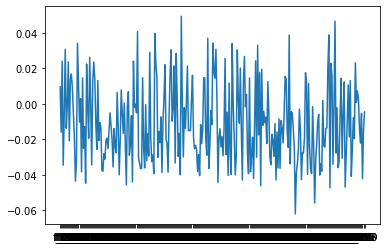

In [23]:
import matplotlib.pyplot as plt
plt.plot(f_cols, corr_out)

In [24]:
plt.close()

In [26]:
output = pd.DataFrame(corr_out)
output.to_csv('train.csv')

In [14]:
# corr = x.corr()
# sns.heatmap(corr,cmap='coolwarm')

In [15]:
# score_list = pd.DataFrame(np.zeros(shape=(300,1)),columns=['rsme'])
# for n in range(1,300):
#     cols = list(x.columns)
#     model = RandomForestRegressor()
#     rfe = RFE(model, n)             
#     x_rfe = rfe.fit_transform(x,y)  
#     model.fit(x_rfe,y)              
#     temp = pd.Series(rfe.support_,index = cols)
#     selected_features_rfe = temp[temp==True].index
#     selected_x = pd.DataFrame(x,columns=selected_features_rfe)
#     selected_x_test = pd.DataFrame(x_test,columns=selected_features_rfe)
#     reg = ElasticNetCV()
#     reg.fit(selected_x, y)
#     coef = pd.Series(reg.coef_, index = selected_x.columns)
#     emb_cols=coef[coef!=0].index
#     emb_sel_x = pd.DataFrame(selected_x,columns=emb_cols)
#     emb_sel_x_test = pd.DataFrame(selected_x_test,columns=emb_cols)
#     x_train,x_val,y_train,y_val=train_test_split(emb_sel_x,y,test_size=0.2,random_state=0)
#     model.fit(x_train,y_train)
#     rmse = mse(model.predict(x_val),y_val)
#     score_list.loc[n,'rsme']=np.sqrt(rmse)
# score_list.sort_values('rsme',ascending = True).head(50)